# Busines Understanding

Salah satu bank terkemuka ingin memprediksi nasabah yang terindikasi kredit macet saat mengajukan pinjaman.

Pemberi pinjaman biasanya membuat dua jenis keputusan: pertama, apakah akan memberikan kredit kepada pemohon baru, dan kedua, bagaimana menangani pemohon yang sudah ada, termasuk apakah akan meningkatkan batas kredit mereka. Dalam kedua kasus, apa pun teknik yang digunakan, sangat penting bahwa ada sampel besar pelanggan sebelumnya dengan detail aplikasi, pola perilaku, dan riwayat kredit berikutnya yang tersedia. Sebagian besar teknik menggunakan sampel ini untuk mengidentifikasi hubungan antara karakteristik konsumen (pendapatan tahunan, usia, jumlah tahun bekerja dengan pemberi kerja saat ini, dll.) Dan riwayat mereka selanjutnya.

Area aplikasi khas di pasar konsumen meliputi: kartu kredit, pinjaman mobil, hipotek rumah, pinjaman ekuitas rumah, pesanan katalog surat, dan berbagai macam produk pinjaman pribadi.


Goal:
1. Prediksi Potensi Nasabah Gagal Bayar
- Problem: Klasifikasi
- kemungkinan Algoritma:
  a. Decision Tree
  b. SVM
  c. Random Forest
  d. Xboost Tree classification
- Varibel Target: Default


2. Predictive nilai kredit yang akan diberikan kepada nasabah lama (OLd nasabah)
Problem: Estimasi
- Linear Regression
- MLP Regressor

# Data Understanding

There are 9 attributes containing 850 customer records followed by:

age: Umur nasabah

ed : Level pendidikan nasabah

employ : Masa jabatan dengan pemberi kerja saat ini (dalam tahun)

address : Jumlah tahun di alamat yang sama

income : Pendapatan nasabah

debtinc : Debt to income ratio (Rasio hutang terhadap pendapatan) Rasio hutang terhadap pendapatan adalah semua pembayaran hutang bulanan Anda dibagi dengan pendapatan kotor bulanan Anda. Angka ini adalah salah satu cara pemberi pinjaman mengukur kemampuan Anda untuk mengelola pembayaran bulanan untuk melunasi uang yang Anda rencanakan untuk dipinjam. Rasio hutang terhadap pendapatan Anda tidak secara langsung mempengaruhi nilai kredit Anda. Ini karena lembaga kredit tidak tahu berapa banyak uang yang Anda peroleh, sehingga mereka tidak dapat melakukan penghitungan

creddebt : Credit to debt ratio (Rasio kredit terhadap utang) Menunjukkan bahwa persentase rasio hutang terhadap kredit yang baik di bawah 30%. Dan itu berlaku untuk rasio Anda pada salah satu kartu Anda secara terpisah serta untuk rasio keseluruhan Anda.

othdebt : utang lainnya

default : Label pelanggan gagal di masa lalu (1 = gagal , 0 = tidak pernah gagal)

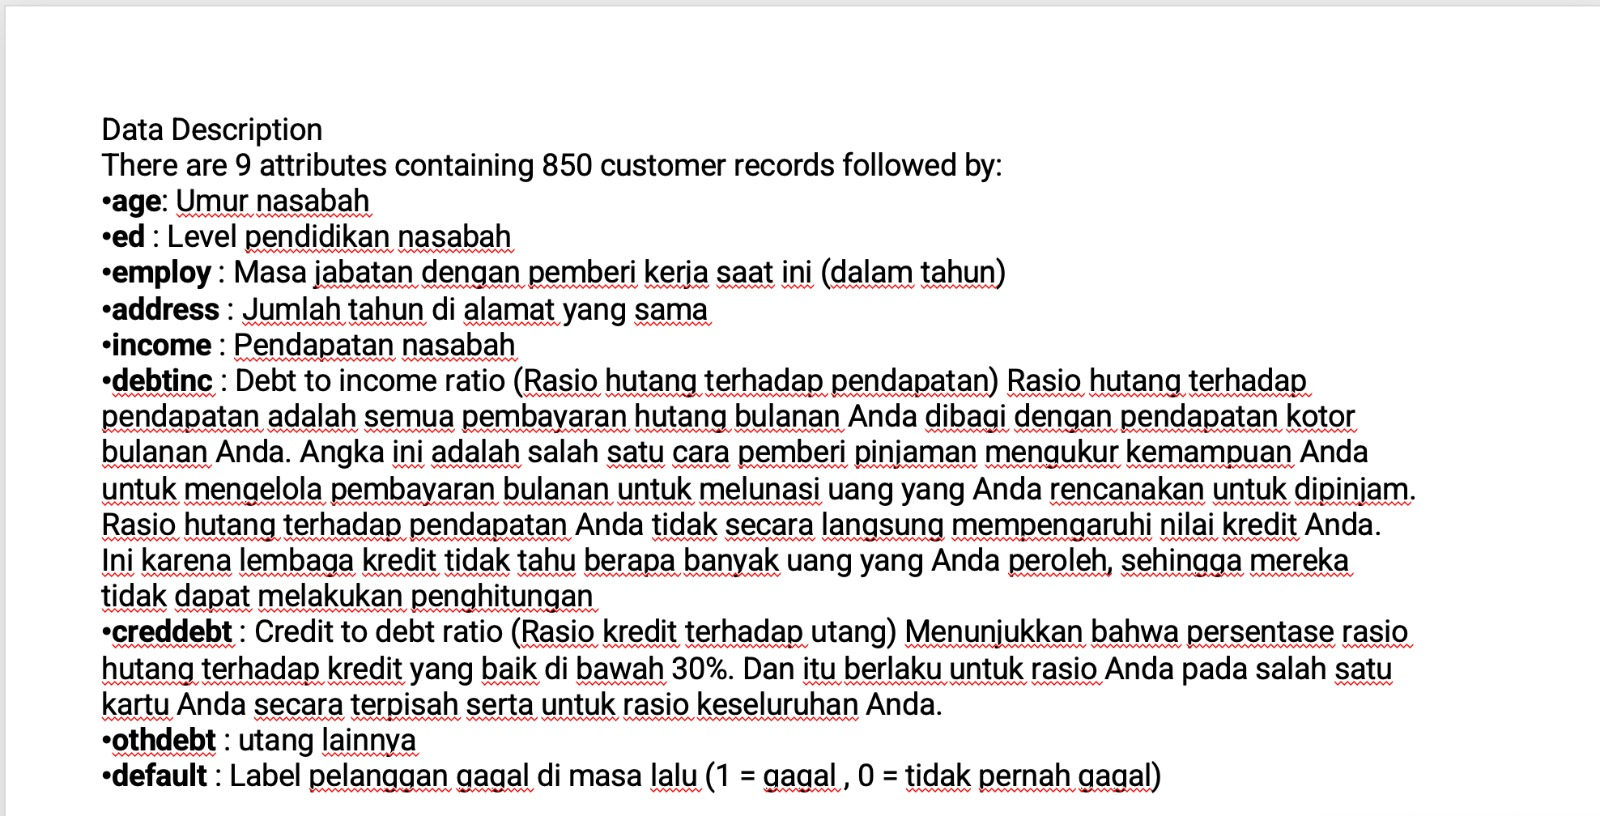

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [69]:
#  Loading Data

path = "/content/drive/MyDrive/DataSource/credit_risk_1.csv"
load_data = pd.read_csv(path)

In [70]:
# Membuat data frame

df=pd.DataFrame(load_data)
df.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  700 non-null    int64  
 1   age         700 non-null    int64  
 2   ed          700 non-null    int64  
 3   employ      700 non-null    int64  
 4   address     700 non-null    int64  
 5   income      700 non-null    int64  
 6   debtinc     700 non-null    float64
 7   creddebt    700 non-null    float64
 8   othdebt     700 non-null    float64
 9   default     700 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 54.8 KB


In [72]:
df['age'].value_counts()

29    44
28    37
39    37
31    36
41    34
34    33
36    29
27    28
40    27
35    27
32    25
33    25
30    24
24    24
38    23
26    23
37    22
25    20
23    18
43    17
42    16
47    16
45    16
48    15
46    13
22    12
21    10
44     9
50     8
52     7
53     6
51     6
54     4
49     4
55     2
20     2
56     1
Name: age, dtype: int64

In [73]:
df['ed'].value_counts()

1    372
2    198
3     87
4     38
5      5
Name: ed, dtype: int64

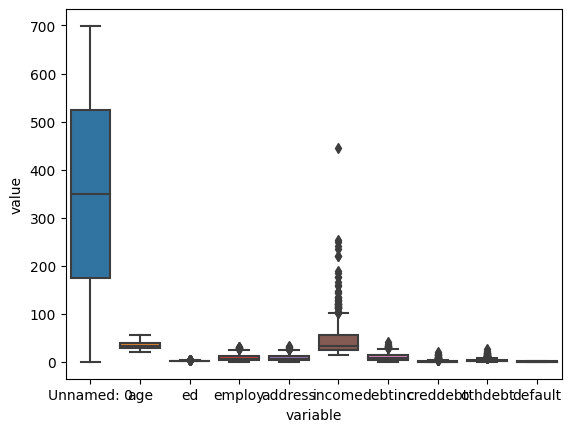

In [74]:
sns.boxplot(x='variable', y='value', data=pd.melt(df))
plt.show()

In [75]:
dfx= df[['age',	'ed',	'employ',	'address',	'debtinc',	'creddebt',	'othdebt',	'default']]

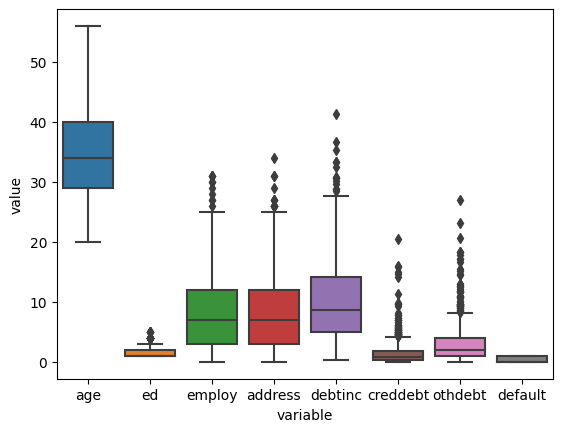

In [76]:
sns.boxplot(x='variable', y='value', data=pd.melt(dfx))
plt.show()

In [77]:
dfx1= df[['ed',	'creddebt',	'othdebt',	]]

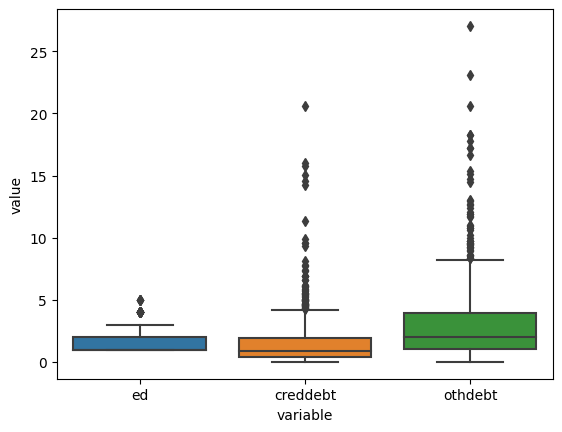

In [78]:
sns.boxplot(x='variable', y='value', data=pd.melt(dfx1))
plt.show()

In [79]:
dfx2= df[[	'employ',	'address',	'debtinc','othdebt',]]

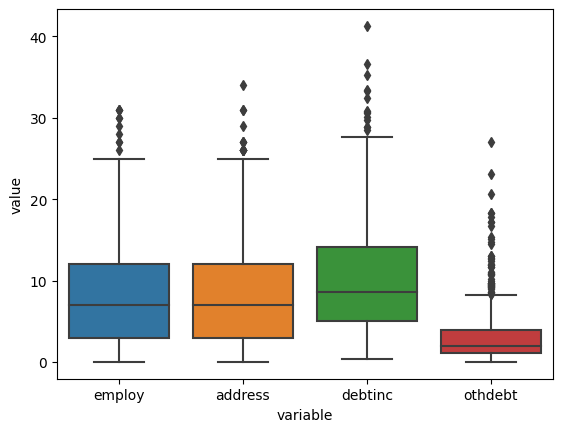

In [80]:
sns.boxplot(x='variable', y='value', data=pd.melt(dfx2))
plt.show()

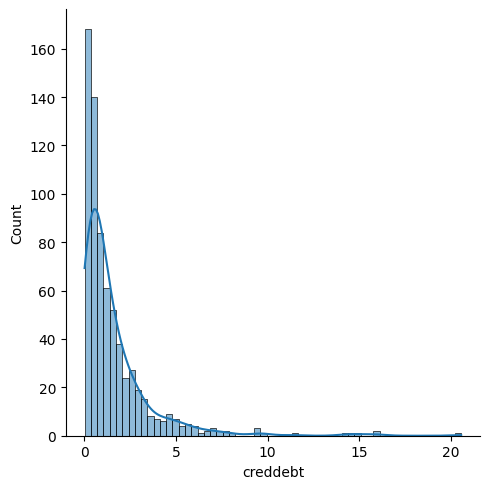

In [81]:
sns.displot(data=df, x="creddebt", kde=True)

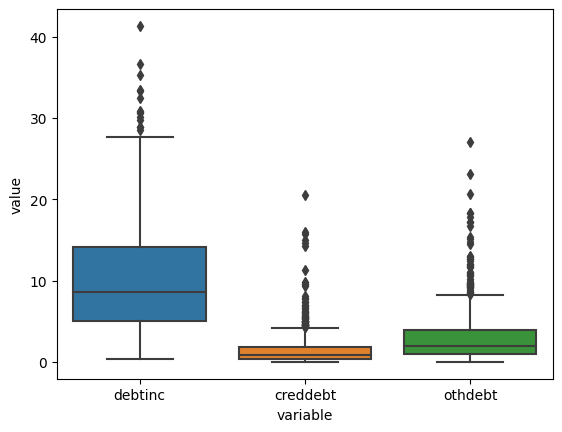

In [82]:
dfx3= df[['debtinc',	'creddebt',	'othdebt']]
sns.boxplot(x='variable', y='value', data=pd.melt(dfx3))
plt.show()

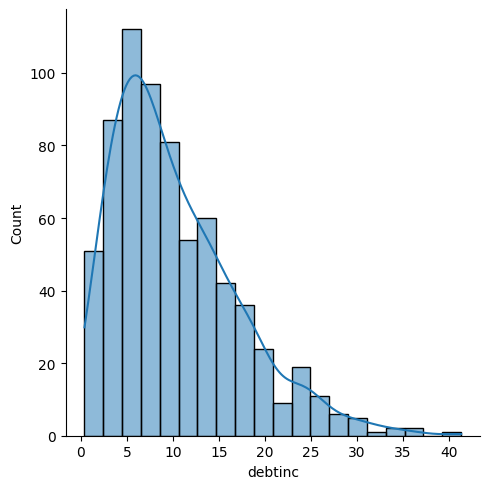

In [83]:
sns.displot(data=df, x="debtinc", kde=True)

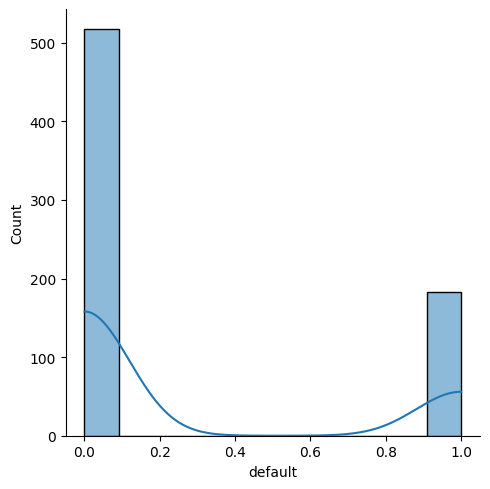

In [84]:
sns.displot(data=df, x="default", kde=True)

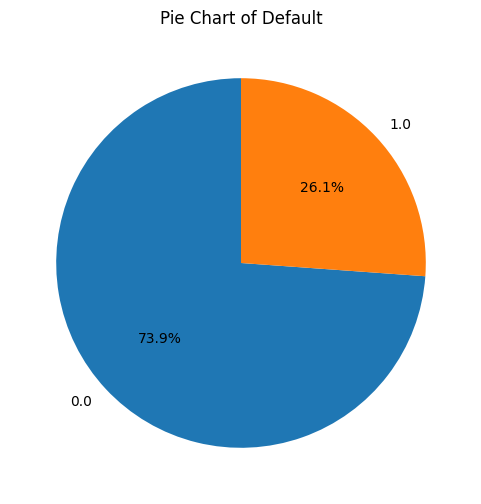

In [85]:

default_counts = df['default'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(default_counts, labels=default_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Pie Chart of Default")
plt.show()

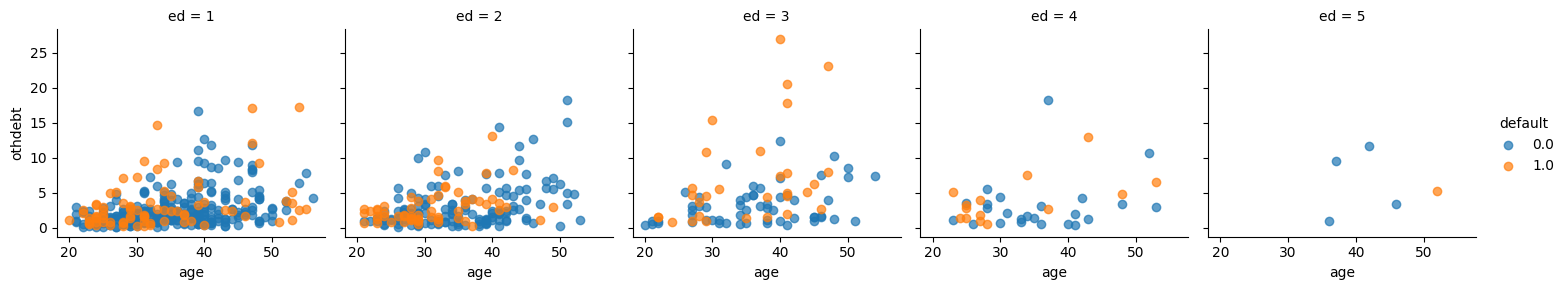

In [86]:
scatplot = sns.FacetGrid(df, col='ed', hue='default')
scatplot.map(plt.scatter, 'age', 'othdebt', alpha=.7)
scatplot.add_legend()

### Interpretasi grafik

- ed 1: age 20-30 terjadi banyak gagal bayar
- ed 2: age 20-40 terjadi banyak gagal bayar
- ed 3: age 30-45 terjadi banyak gagal bayar
- ed 4: age 25-30 terjadi banyak gagal bayar
- ed 5: age > 50 terjadi banyak gagal bayar

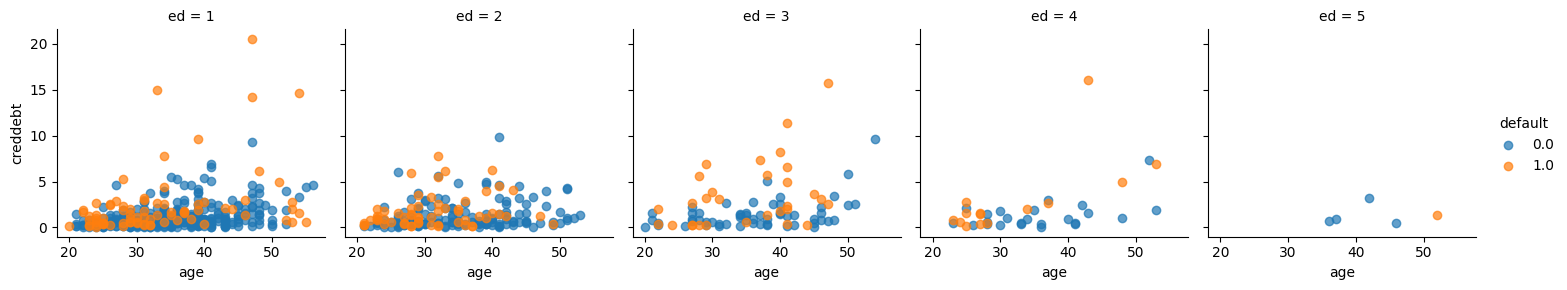

In [87]:
scatplot = sns.FacetGrid(df, col='ed', hue='default')
scatplot.map(plt.scatter, 'age', 'creddebt', alpha=.7)
scatplot.add_legend()

In [88]:
import plotly.express as px
fig = px.scatter(df, x="creddebt", y="othdebt", color="default",
                size="income", hover_data=['age']
)
fig.show()

# Data Preparation

1. Tidak ada temuan missing value
2. Hanya digunakan 1 table

# Modeling: Decision Tree

In [89]:
#Split Training and Testing

from sklearn.model_selection import train_test_split # Import train_tes_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [90]:
# Input Varibel
x=df[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]

# Target Variabel
y=df['default'].astype('category')

In [91]:
# Split: Training 70% & Testing 30%

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [92]:
#Evaluation Model

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [93]:
from sklearn.tree import DecisionTreeClassifier #Import Decision Tree Classifier

In [94]:
# Object Decision tree
clf = DecisionTreeClassifier()

# Train Model
model_clf = clf.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_clf = model_clf.predict(x_test)

In [95]:
# evaluasi Klasifikasi
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

         0.0       0.79      0.72      0.75       155
         1.0       0.36      0.45      0.40        55

    accuracy                           0.65       210
   macro avg       0.57      0.59      0.58       210
weighted avg       0.68      0.65      0.66       210



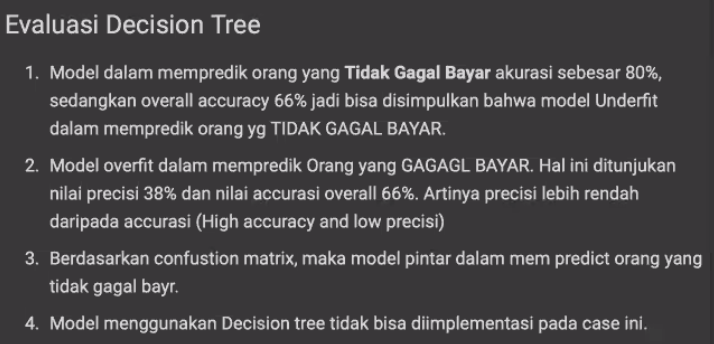

Text(113.9222222222222, 0.5, 'Predict Label')

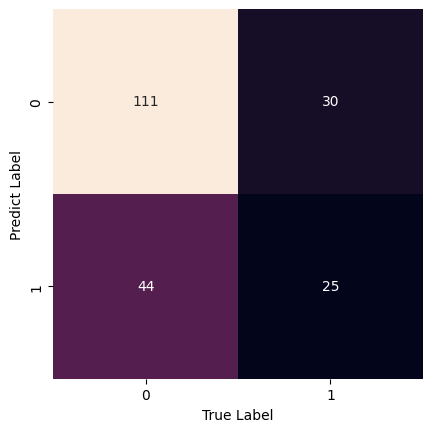

In [96]:
# Memvisualisasikan Confusion Matrix

mat=confusion_matrix(y_test,y_pred_clf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

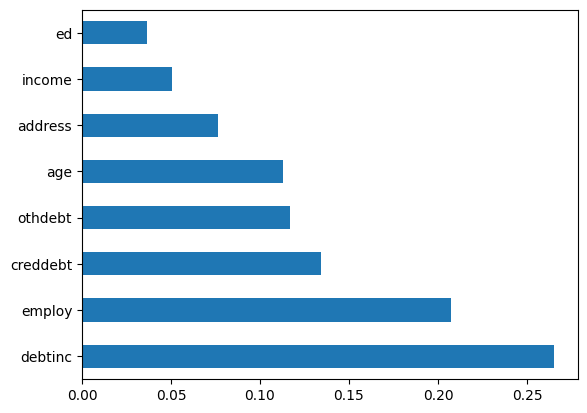

In [97]:
# Signifikan factor model

feat_importances = pd.Series(model_clf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Modeling: Random Forest

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [99]:
# Object Random forest
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=6
)

# Train Model
model_rf = rf.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_rf = model_rf.predict(x_test)

In [100]:
# evaluasi Random forest
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87       155
         1.0       0.70      0.35      0.46        55

    accuracy                           0.79       210
   macro avg       0.75      0.65      0.67       210
weighted avg       0.78      0.79      0.76       210



## Hasil Evaluasi Pemodelan Random Forrest


1.  Model UNderfit dalam mempredik orang yang Tidak Gagal Bayar akurasi sebesar 80%, sedangkan overall accuracy 77% jadi bisa disimpulkan bahwa model Underfit dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model overfit dalam mempredik Orang yang GAGAGL BAYAR. Hal ini ditunjukan nilai precisi 62% dan nilai accurasi overall 77%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
Model menggunakan Decision tree tidak bisa diimplementasi pada case ini.

## Hasil Evaluasi setelah tunning model dengan menambahkan hyperparameter

1. Model dinilai tepat dalam memprediksi nilai 0 (tdk gagal bayar)
2. Model overfit dalam memprediksi nilai 1 (Gagal bayar)
3. Model Random Forest belum tepat diterapkan pada study case ini

Text(113.9222222222222, 0.5, 'Predict Label')

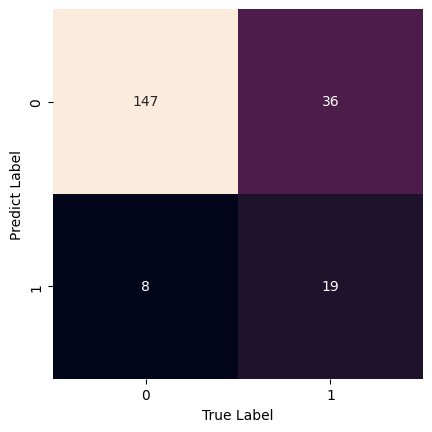

In [101]:
# Memvisualisasikan Confusion Matrix Random Forest

mat=confusion_matrix(y_test,y_pred_rf)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

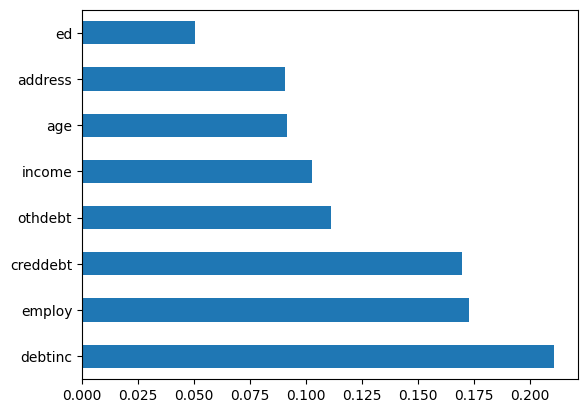

In [102]:
# Signifikan factor model

feat_importances = pd.Series(model_rf.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

# Modeling: SVM

In [103]:
# Import SVM
from sklearn.svm import SVC

In [104]:
# Object SVM
svm = SVC(kernel='linear', random_state = 0)

# Train Model
model_svm = svm.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_svm = model_svm.predict(x_test)

In [105]:
# evaluasi SVM
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.82      0.94      0.88       155
         1.0       0.73      0.44      0.55        55

    accuracy                           0.81       210
   macro avg       0.78      0.69      0.71       210
weighted avg       0.80      0.81      0.79       210



Text(113.9222222222222, 0.5, 'Predict Label')

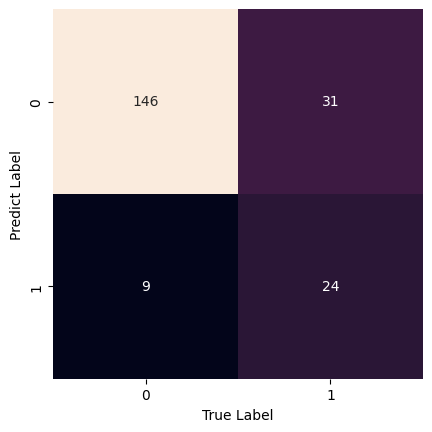

In [106]:
# Memvisualisasikan Confusion Matrix Random Forest

mat=confusion_matrix(y_test,y_pred_svm)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

## Hasil Evaluasi SVM


1.  Model akurat dalam mempredik orang yang Tidak Gagal Bayar akurasi sebesar 81%, sedangkan presisi 82% jadi bisa disimpulkan bahwa model akurat dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model overfit dalam mempredik Orang yang GAGAGL BAYAR. Hal ini ditunjukan nilai precisi 73% dan nilai accurasi overall 81%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan svm tidak bisa diimplementasi pada case ini.

# Modeling: XGBoost

In [107]:
from xgboost import XGBClassifier

In [108]:
# Object xgboost
xgb = XGBClassifier()

# Train Model
model_xgb = xgb.fit(
    x_train,
    y_train
)
# Prediksi
y_pred_xgb = model_xgb.predict(x_test)

In [109]:
# evaluasi xgb
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       155
         1.0       0.57      0.44      0.49        55

    accuracy                           0.77       210
   macro avg       0.69      0.66      0.67       210
weighted avg       0.75      0.77      0.76       210



Text(113.9222222222222, 0.5, 'Predict Label')

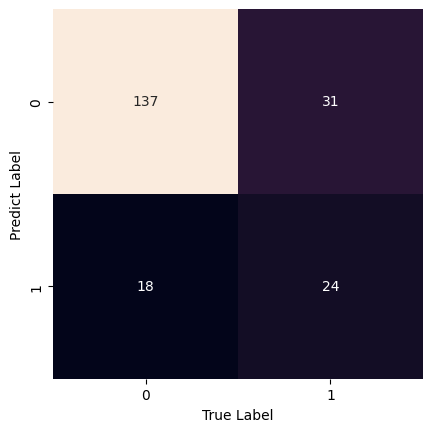

In [110]:
# Memvisualisasikan Confusion Matrix

mat=confusion_matrix(y_test,y_pred_xgb)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('True Label')
plt.ylabel('Predict Label')

<Axes: >

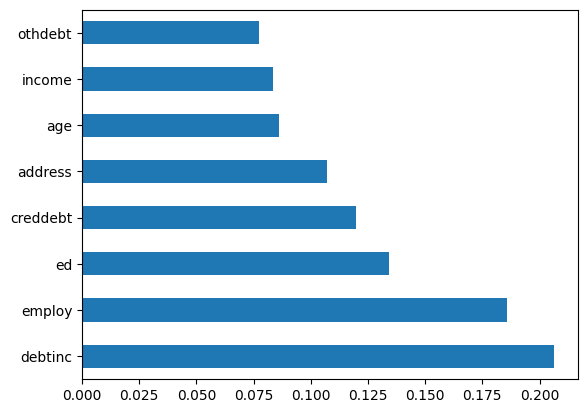

In [111]:
# Signifikan factor model

feat_importances = pd.Series(model_xgb.feature_importances_,index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Hasil Evaluasi xgboost


1.  Model underfit dalam mempredik orang yang Tidak Gagal Bayar akurasi sebesar 77%, sedangkan presisi 82% jadi bisa disimpulkan bahwa model underfit dalam mempredik orang yg TIDAK GAGAL BAYAR.

2. Model overfit dalam mempredik Orang yang GAGAGL BAYAR. Hal ini ditunjukan nilai precisi 57% dan nilai accurasi overall 77%. Artinya precisi lebih rendah daripada accurasi (High accuracy and low precisi)

3. Berdasarkan confustion matrix, maka model pintar dalam mem predict orang yang tidak gagal bayar.
4. Model menggunakan xgboost tidak bisa diimplementasi pada case ini.

# Kesimpulan

1. Model machine learning yang akan digunakan dalam memutuskan mana nasabah yang akan diterima permohonan kreditnya adalah SVM

# Implementasi ML model SVM

In [112]:

path2 = "/content/drive/MyDrive/DataSource/credit_risk_newCust.csv"
load_data2 = pd.read_csv(path2, delimiter=',')

In [113]:
df_NN=pd.DataFrame(load_data2)
df_NN.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [114]:
df_NN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  150 non-null    int64  
 1   age         150 non-null    int64  
 2   ed          150 non-null    int64  
 3   employ      150 non-null    int64  
 4   address     150 non-null    int64  
 5   income      150 non-null    int64  
 6   debtinc     150 non-null    float64
 7   creddebt    150 non-null    float64
 8   othdebt     150 non-null    float64
 9   default     0 non-null      float64
dtypes: float64(4), int64(6)
memory usage: 11.8 KB


In [115]:
# Input Varibel
x1=df_NN[['age','ed','employ','address','income','debtinc','creddebt','othdebt']]




# Applaying SVM

In [116]:
y_predict_NN = model_svm.predict(x1)
y_predict_NN

array([0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [117]:
# Mengubah hasil pemodelan yg berbentuk array menjadi Data Frame

df_y_predict_NN = pd.DataFrame({'Prediction_Gagal_Bayar':y_predict_NN}).round(2)

df_y_predict_NN

,Prediction_Gagal_Bayar
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
145,0.0
146,0.0
147,0.0
148,0.0


In [118]:
# Menggabungkan dataset NewCustomer dan hasil predictnya

df_hasil_predict_svm=pd.concat([df_NN,df_y_predict_NN], sort=False, axis=1)
df_hasil_predict_svm.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default,Prediction_Gagal_Bayar
0,700,36,1,16,13,32,10.9,0.544128,2.943872,NaN,0.0
1,701,50,1,6,27,21,12.9,1.316574,1.392426,NaN,0.0
2,702,40,1,9,9,33,17.0,4.880700,0.729300,NaN,1.0
3,703,31,1,5,7,23,2.0,0.046000,0.414000,NaN,0.0
4,704,29,1,4,0,24,7.8,0.866736,1.005264,NaN,0.0


In [119]:
df_hasil_predict_svm['Prediction_Gagal_Bayar'].value_counts()

0.0    127
1.0     23
Name: Prediction_Gagal_Bayar, dtype: int64

# 2. Predictive nilai kredit yang akan diberikan kepada nasabah lama (OLd nasabah)
Problem: Estimasi
- Linear Regression
- MLP Regressor

In [120]:
df_oldNasabah=df
df_oldNasabah.head()

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [121]:
# Kenaikan nilai kredit kepada nasabah lama tdk pernah gagal bayar

df_oldNasabah1=df_oldNasabah[(df_oldNasabah['default']==0)&(df_oldNasabah['creddebt']<0.3)]
df_oldNasabah1

,Unnamed: 0,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
7,7,43,1,12,11,38,3.6,0.128592,1.239408,0.0
10,10,27,1,0,1,16,1.7,0.182512,0.089488,0.0
11,11,25,1,4,0,23,5.2,0.252356,0.943644,0.0
19,19,41,3,0,21,26,1.7,0.099008,0.342992,0.0
29,29,26,3,2,1,37,14.2,0.204906,5.049094,0.0
...,...,...,...,...,...,...,...,...,...,...
679,679,35,1,17,4,42,3.0,0.093240,1.166760,0.0
683,683,21,1,1,1,16,6.3,0.141120,0.866880,0.0
689,689,30,1,4,2,18,10.7,0.227268,1.698732,0.0
690,690,24,2,0,5,16,7.3,0.024528,1.143472,0.0


<Axes: title={'center': 'Pearson Corelation'}>

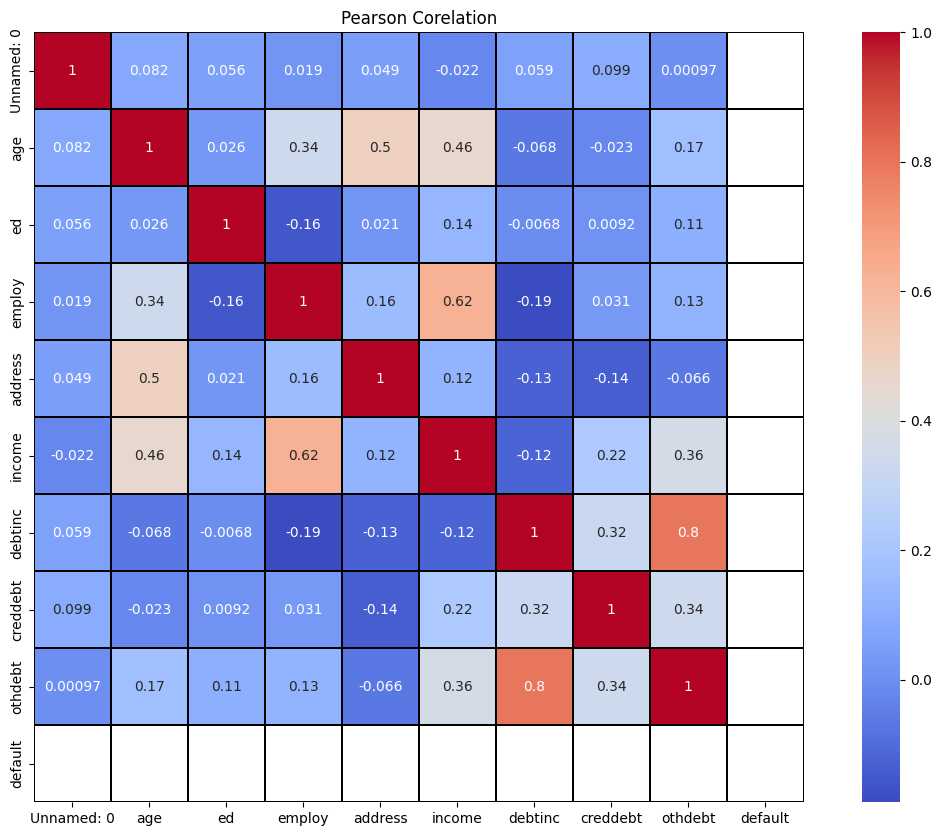

In [122]:
f,ax= plt.subplots(figsize=(15,10))
plt.title("Pearson Corelation")
sns.heatmap(df_oldNasabah1.astype(float).corr(), linewidth=0.25, vmax=1.0, square=True, cmap="coolwarm", linecolor='black', annot=True)

In [148]:
# Menentukan input variabel

x2=df_oldNasabah1[['age','ed','employ','address','income','creddebt','othdebt','default']]

# Menentukan Target Variabel
y2=df_oldNasabah1[['debtinc']]

In [149]:
# untuk split data kita menjadi training dan testing
from sklearn.model_selection import train_test_split
# untuk Linear model
from sklearn.linear_model import LinearRegression
# untuk evaluasi model
from sklearn import metrics

In [150]:
# Split: Training 70% & Testing 30%

x_train2, x_test2, y_train2, y_test2 = train_test_split(x2,y2, test_size=0.3, random_state=0)

### Linear Regression

In [151]:
reg_ln = LinearRegression()

In [152]:

# Train Model
model_ln=reg_ln.fit(
    x_train2,
    y_train2
)

In [153]:
# Memprediksi dengan data test
y_pred_reg2=model_ln.predict(x_test2)

In [154]:
# Evaluasi
print('r2_score : ', metrics.r2_score(y_test2, y_pred_reg2))

r2_score :  0.7160095894048255


In [156]:
# MAPE
def mean_mape(y_true, y_pred):
 y_true,y_pred= np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true-y_pred)/y_true))*100

In [157]:
print('MAPE: ', mean_mape(y_test2, y_pred_reg2))

MAPE:  25.796780757678
